# 🧩 Problem 4: Nonlinear Simulation – Step Responses

## 🎯 Objective
Analyze the step responses of the nonlinear four-tank system under both deterministic and stochastic conditions, identify an equivalent linear model, and compute the corresponding impulse response coefficients.

---

## 4.1 Deterministic Step Responses
Simulate the **step responses** for the following input magnitudes:
- 10% step in manipulated variables  
- 25% step in manipulated variables  
- 50% step in manipulated variables  

**Tasks:**
- [ ] Apply step inputs to each manipulated variable.  
- [ ] Simulate the system response using the deterministic (noise-free) nonlinear model.  
- [ ] Plot the step responses for each input magnitude.  
- [ ] Normalize the responses for comparison.

---

## 4.2 Stochastic Step Responses (With Noise)
Repeat the previous simulations, but include **process and measurement noise**.  
Use three different noise levels:
- Low noise  
- Medium noise  
- High noise  

**Tasks:**
- [ ] Add Gaussian noise to the process and measurements.  
- [ ] Simulate and plot the responses for 10%, 25%, and 50% steps under each noise level.  
- [ ] Plot the normalized responses for comparison.  
- [ ] Discuss the effect of increasing noise.

---

## 4.3 Normalized Step Responses
**Tasks:**
- [ ] Normalize all step responses by dividing by the corresponding input change.  
- [ ] Plot the normalized responses (output per unit input step).  
- [ ] Comment on the steady-state gain and response dynamics.

---

## 4.4 Linear Model Identification
From the **normalized step responses**, identify a **transfer function model** for the four-tank system.

**Tasks:**
- [ ] Estimate a first-order (or second-order if necessary) transfer function between each input–output pair.  
- [ ] Compare the identified model response with the nonlinear simulation.  
- [ ] Report the identified transfer functions.  
- [ ] Discuss:
  - Model accuracy  
  - Experimental design requirements (e.g., step size, noise influence, steady-state time)

---

## 4.5 Impulse Response (Markov Parameters)
Compute the **discrete-time impulse response coefficients** (Markov parameters) from the identified linear model.

**Tasks:**
- [ ] Choose an appropriate sampling time \( T_s \).  
- [ ] Compute the discrete impulse response sequence \( g[k] \).  
- [ ] Plot \( g[k] \) for each input–output channel.  
- [ ] Interpret:
  - The dynamic coupling between inputs and outputs  
  - How quickly the system responds

---

## 📝 Summary & Discussion
**Tasks:**
- [ ] Summarize the main findings:
  - Deterministic vs stochastic response differences  
  - Effect of noise on model identification  
  - Accuracy of the linear approximation  
- [ ] Comment on limitations and possible improvements.

---

📎 *Tip:* Organize results using clear subplots and consistent labeling:
- Each subplot should indicate step size, noise level, and input/output pair.  
- Use consistent color coding or line styles for easy comparison.


1. Simulate the step responses for 10%, 25% and 50% steps in the manipulated variables. Do
 this for the deterministic model.

In [1]:
import numpy as np
import os
import sys

# Add project root to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.models.nonlinear_model import FourTankNonlinear
from src.models.sde_model import FourTankSDE
from utils.piecewise import piecewise_constant, piecewise_random
from utils.plot import plot_nonlinear_results, plot_normalized_steps
from src.simulation.open_loop.nonlinear_openloop import simulate_nonlinear
from src.simulation.open_loop.sde_openloop import simulate_sde

Simulating: 100%|██████████| 40000/40000 [00:01<00:00, 22767.65time step/s]


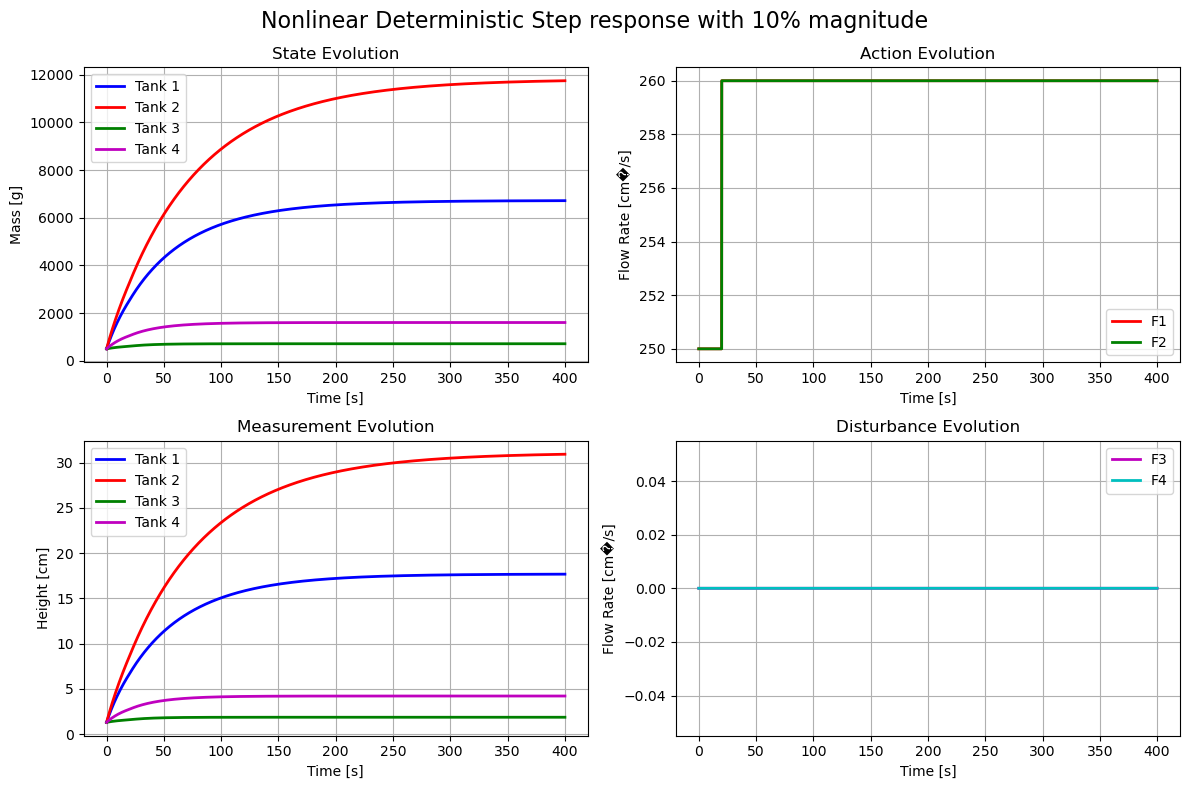

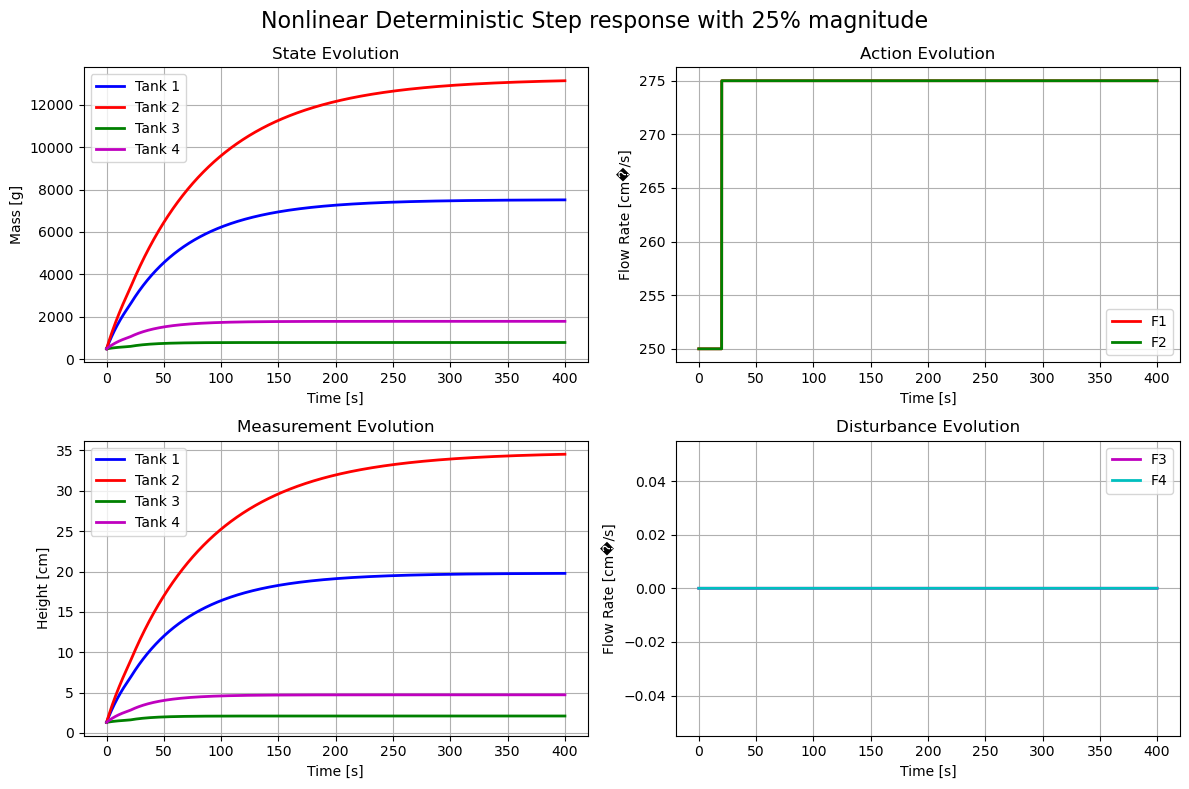

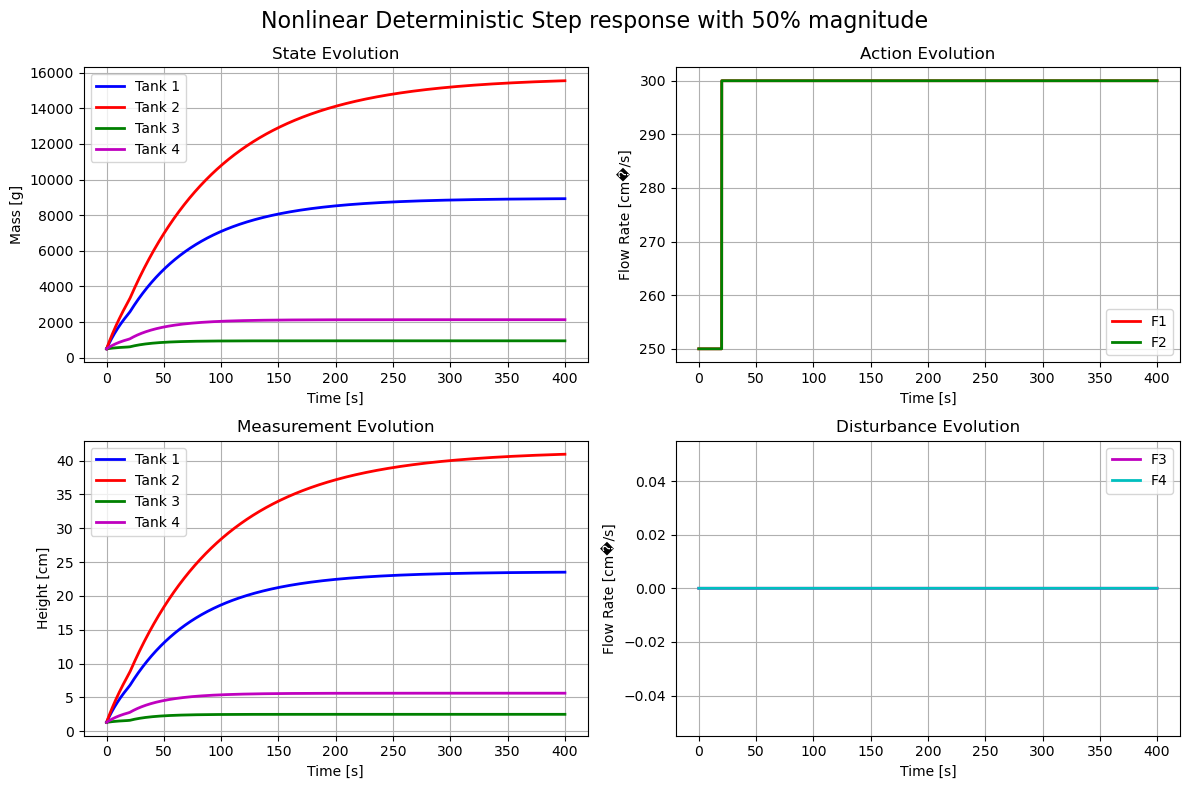

In [2]:
# NO NOISE SIMULATION FOR 10%, 25%, 50%

#===============================
# PARAMETERS
#===============================

# System parameters for the four tank system
params = np.array([
    # Pipe cross-sectional areas a [cm^2]
    1.2, 1.2, 1.2, 1.2,
    # Tank cross-sectional areas A [cm^2]
    380, 380, 380, 380,
    # Flow distribution ratios gamma [-]
    0.58, 0.72,
    # Gravity g [cm/s^2]
    981.0,
    # Density rho [g/cm^3]
    1.0
])


#===============================
# SIMULATION INITIALIZATION
#===============================

# Time
T = 400  # total simulation time [s]
dt = 0.01  # time step [s]
time = np.arange(0, T, dt)

# Initial conditions
x0 = np.array([500, 500, 500, 500])  # initial mass in tanks [g]

# Initialize model
measurement_noise_std = 0  # Standard deviation for measurement noise [cm]
model = FourTankNonlinear(params, x0)

# Piecewise constant disturbances F3 and F4: d(t) = dk for tk≤t<tk+1
d_seq = piecewise_constant([[0, 0], [0, 0]], total_time=T, dt=dt)

# Piecewise constant input sequence (random steps)
#u_seq = create_piecewise_cnst_seq(num_inputs=2, total_time=T, dt=dt, min_val=200, max_val=400, step_resolution=10, number_of_steps=1)
u_nominal = 250
u_step = 100
u = [[u_nominal + u_step]*20, [u_nominal + u_step]*20]
u[0][0] = u_nominal
u[1][0] = u_nominal
u_seq = piecewise_constant(u, total_time=T, dt=dt)

#===============================
# SIMULATION 
#===============================
# SIMULATION
#===============================
percentages = [10, 25, 50]
for p in percentages:
    u_step = 100
    u_step = (p / 100) * u_step
    u = [[u_nominal + u_step]*20, [u_nominal + u_step]*20]

    u[0][0] = u_nominal
    u[1][0] = u_nominal
    u_seq = piecewise_constant(u, total_time=T, dt=dt)

    results = simulate_nonlinear(time, x0, u_seq, d_seq, params, model, dt)

    plot_nonlinear_results(results, title=f'Nonlinear Deterministic Step response with {p}% magnitude')

In [ ]:
# Plot normalized step responses for deterministic model

#===============================
# COLLECT RESULTS FOR NORMALIZED PLOT
#===============================

# Re-run simulations to collect results
percentages = [10, 25, 50]
u_nominal = 250
results_list = []
step_magnitudes_list = []

params = np.array([
    # Pipe cross-sectional areas a [cm^2]
    1.2, 1.2, 1.2, 1.2,
    # Tank cross-sectional areas A [cm^2]
    380, 380, 380, 380,
    # Flow distribution ratios gamma [-]
    0.58, 0.72,
    # Gravity g [cm/s^2]
    981.0,
    # Density rho [g/cm^3]
    1.0
])

T = 400  # total simulation time [s]
dt = 0.01  # time step [s]
time = np.arange(0, T, dt)
x0 = np.array([500, 500, 500, 500])
model = FourTankNonlinear(params, x0)
d_seq = piecewise_constant([[0, 0], [0, 0]], total_time=T, dt=dt)

for p in percentages:
    u_step = 100 * (p / 100)
    u = [[u_nominal + u_step]*20, [u_nominal + u_step]*20]
    u[0][0] = u_nominal
    u[1][0] = u_nominal
    u_seq = piecewise_constant(u, total_time=T, dt=dt)
    
    results = simulate_nonlinear(time, x0, u_seq, d_seq, params, model, dt)
    results_list.append(results)
    
    # Step magnitude for normalization (for each input)
    step_magnitudes_list.append(np.array([u_step, u_step]))

# Plot normalized step responses
plot_normalized_steps(results_list, step_magnitudes_list, labels=['10% Step', '25% Step', '50% Step'])

2. Simulate the step responses for 10%, 25% and 50% steps in the manipulated variables. In
 this case you should include process and measurement noise. Try 3 different noise levels
 (low noise, medium noise, and high noise).

Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4656.04time step/s]


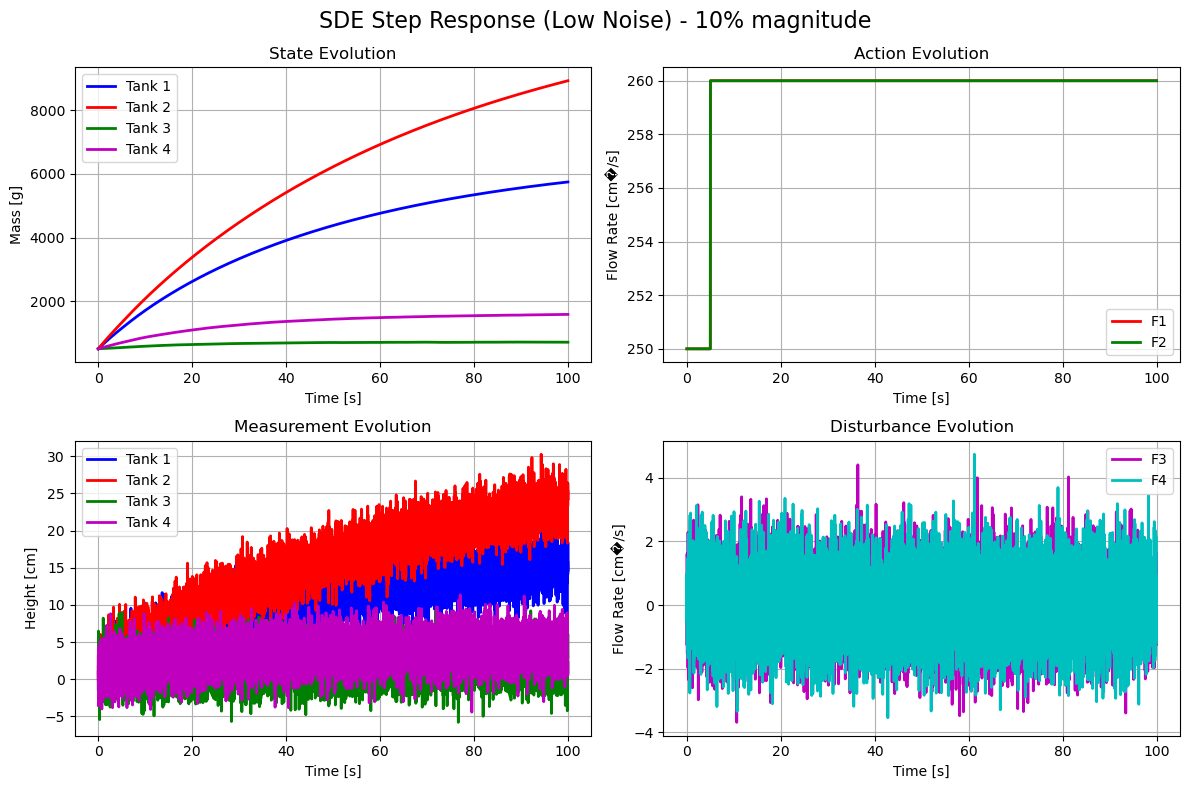

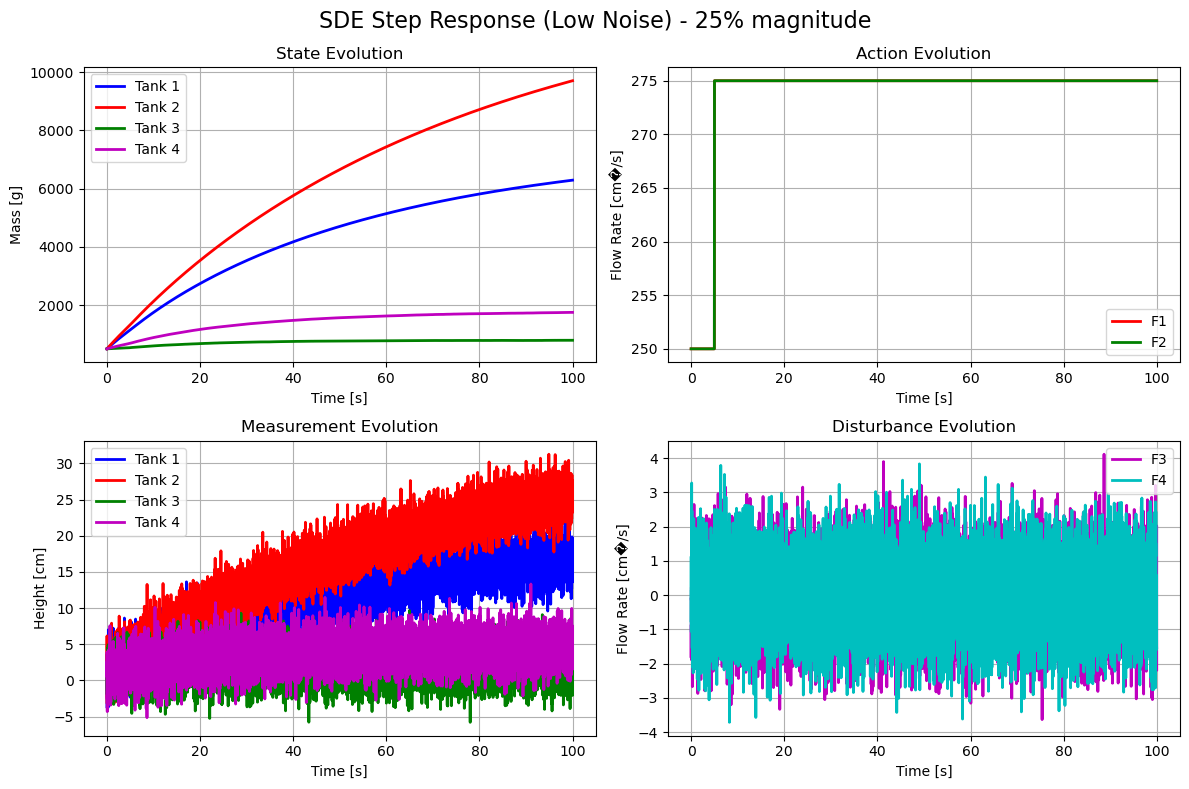

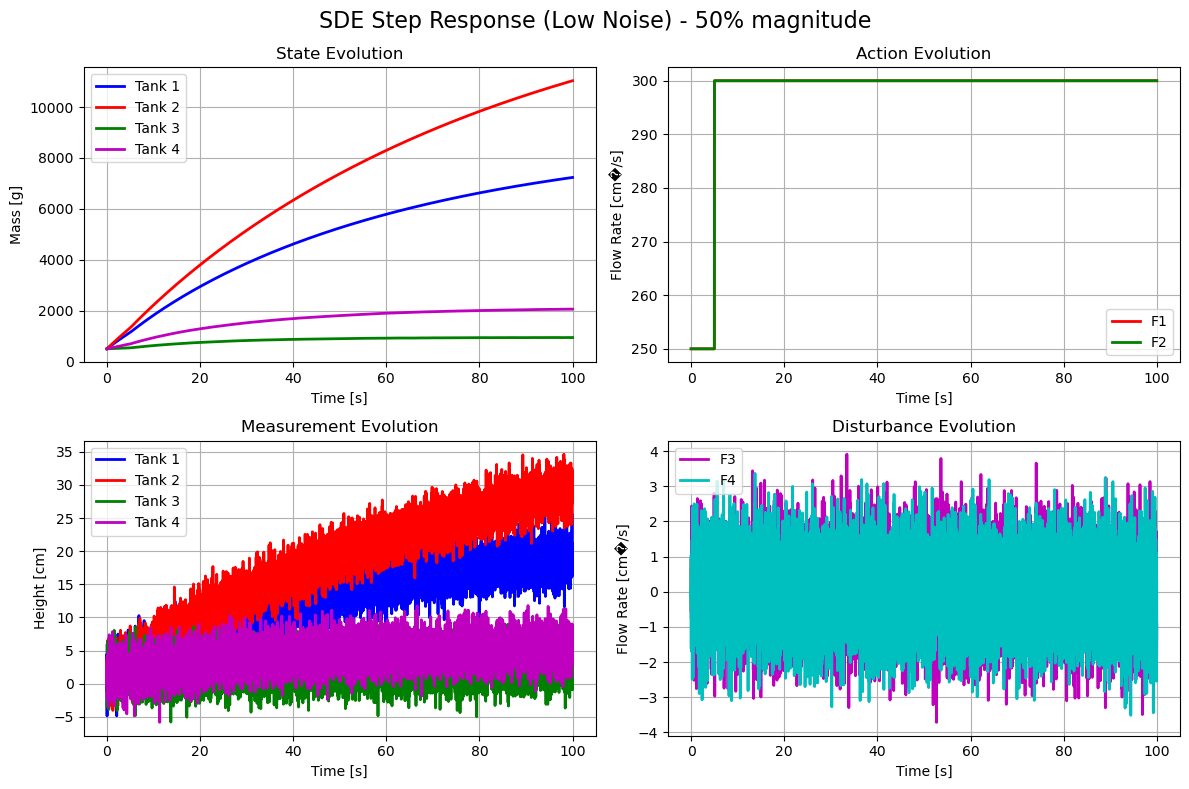

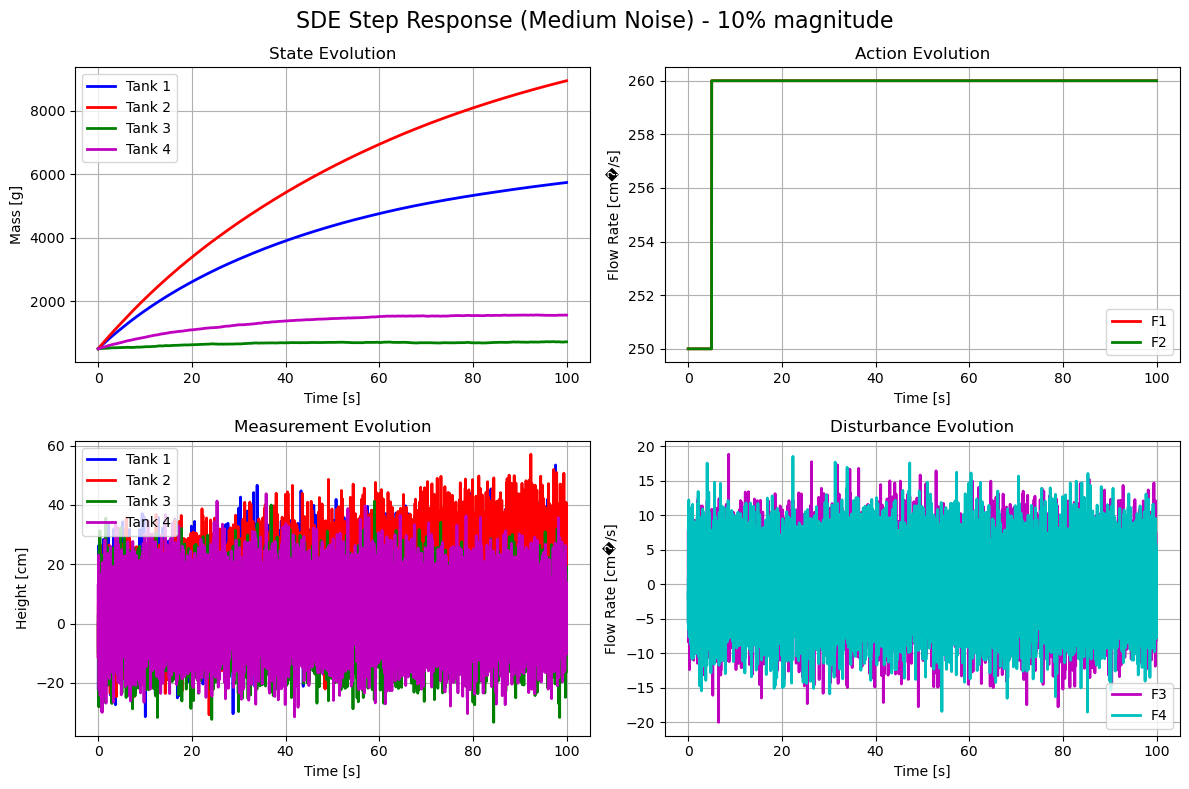

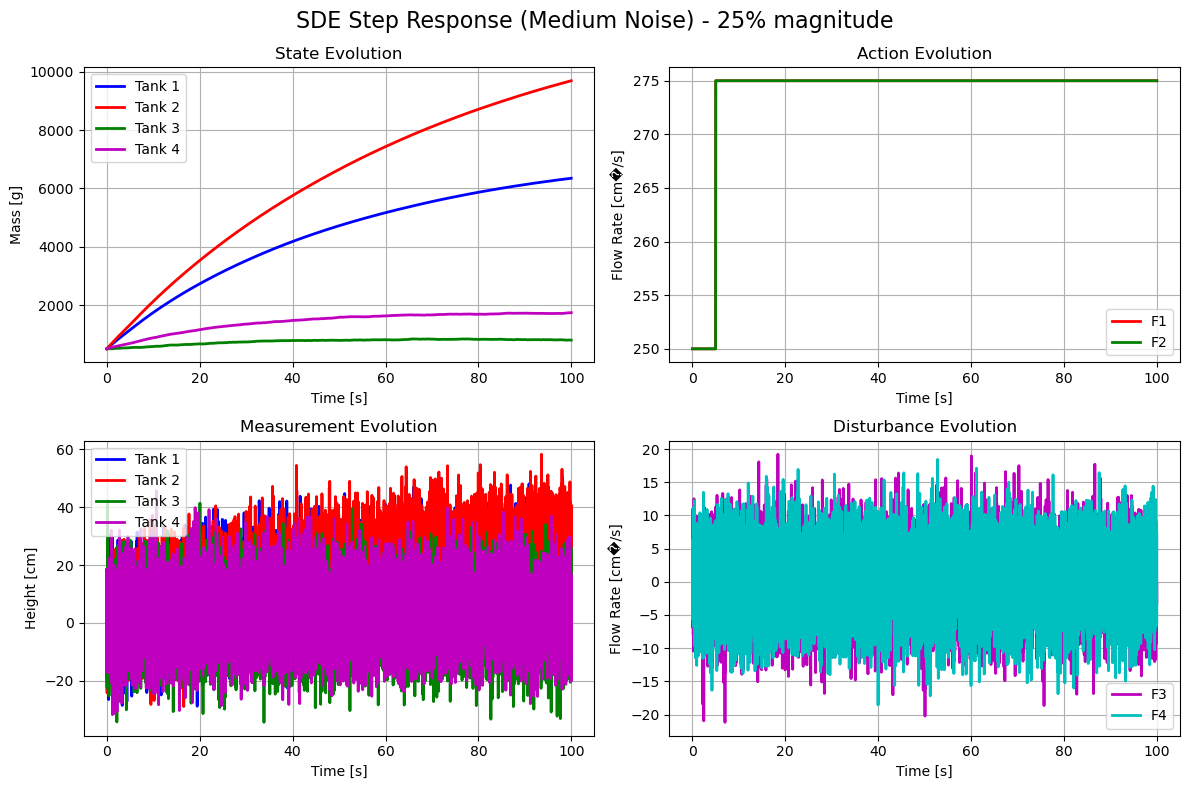

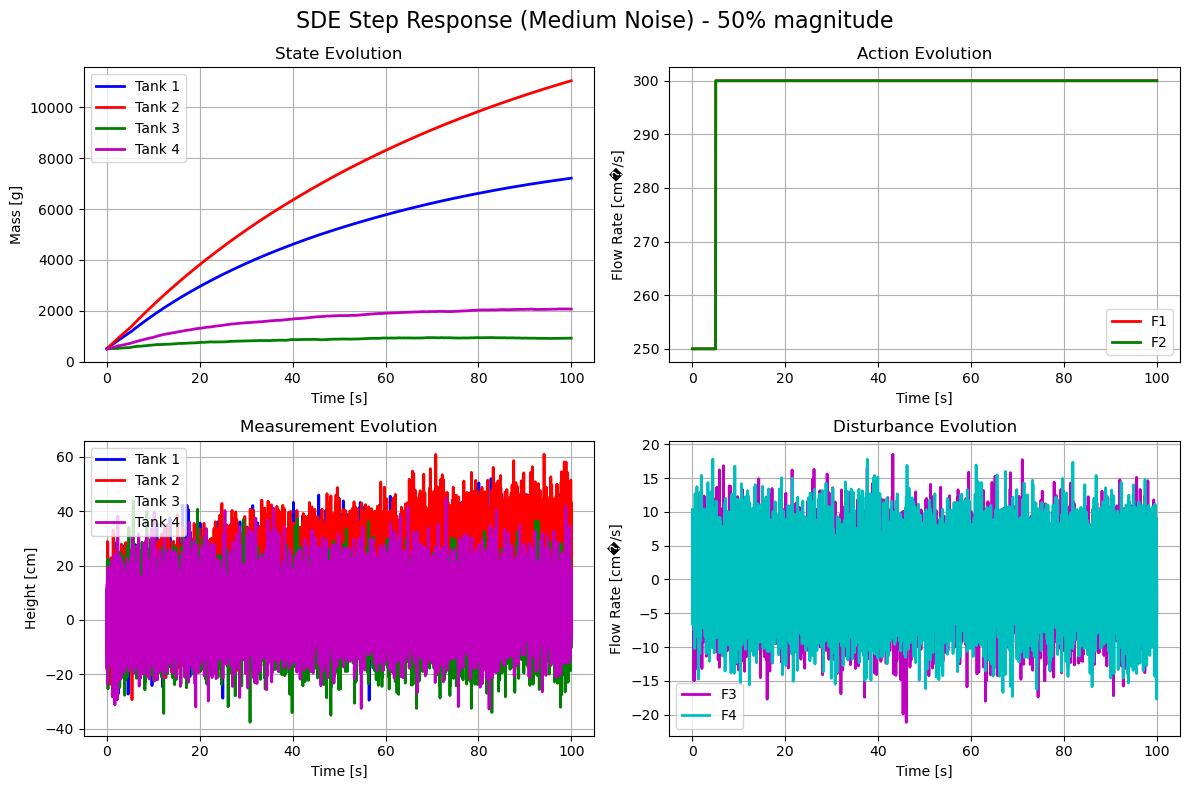

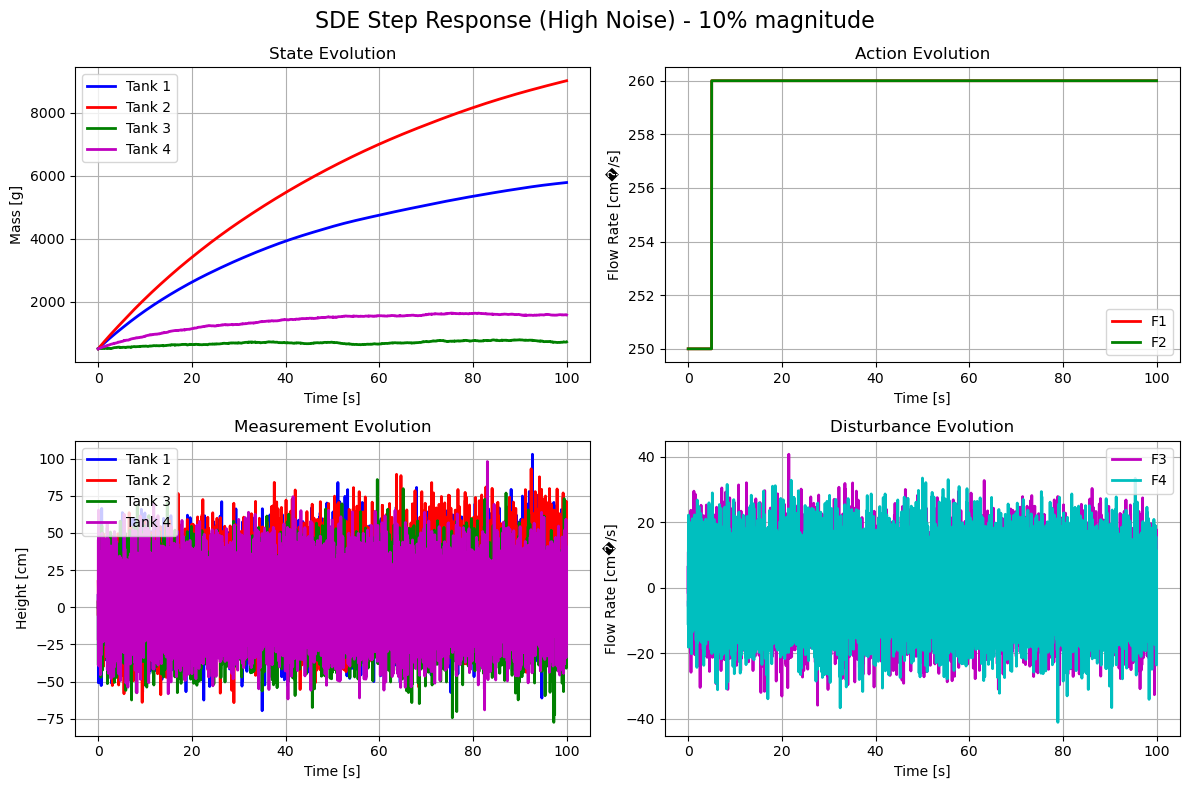

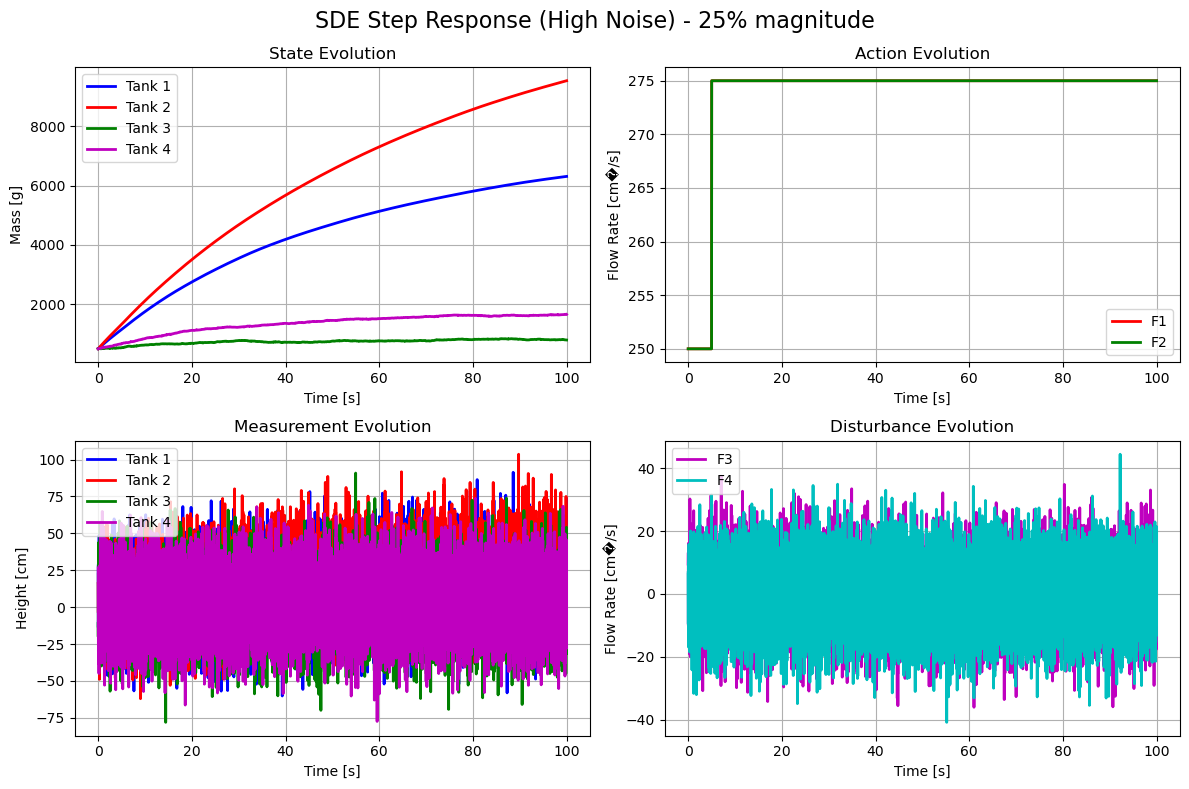

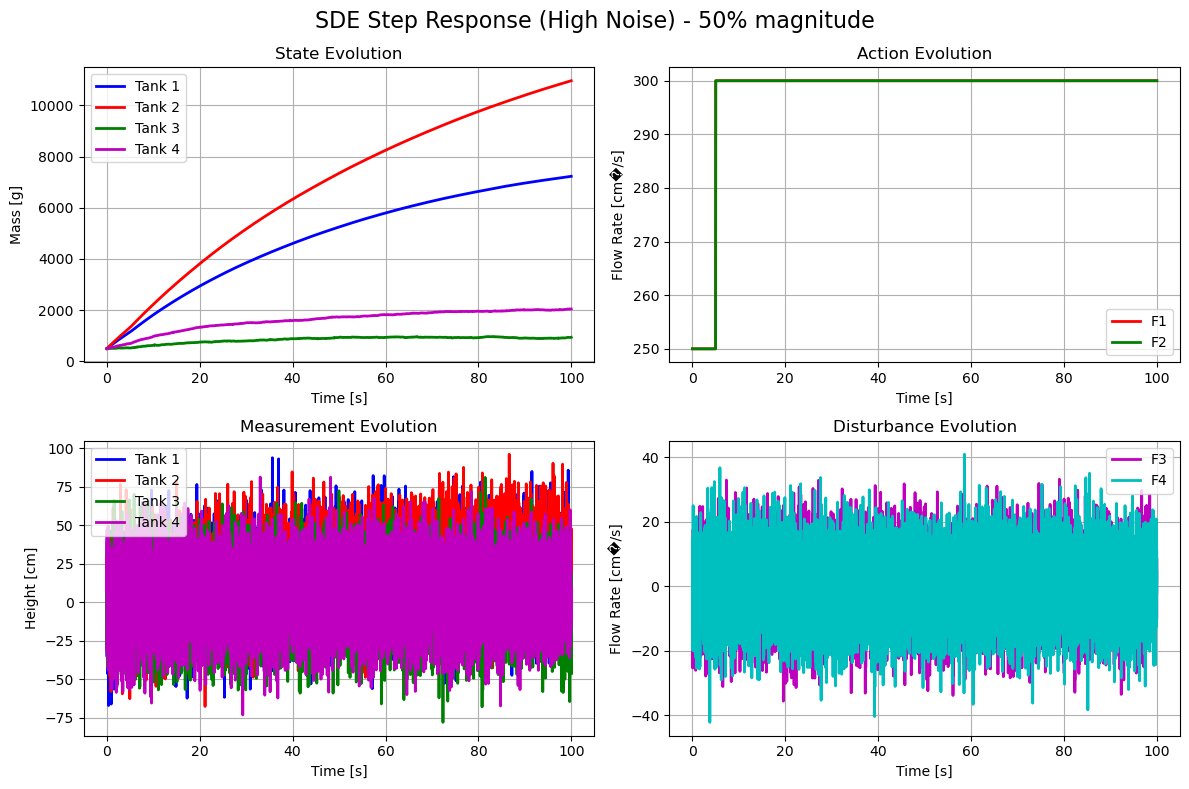

In [3]:
# STOCHASTIC SIMULATION FOR 10%, 25%, 50% WITH NOISE

#===============================
# PARAMETERS
#===============================

# System parameters for the four tank system
params = np.array([
    # Pipe cross-sectional areas a [cm^2]
    1.2, 1.2, 1.2, 1.2,
    # Tank cross-sectional areas A [cm^2]
    380, 380, 380, 380,
    # Flow distribution ratios gamma [-]
    0.58, 0.72,
    # Gravity g [cm/s^2]
    981.0,
    # Density rho [g/cm^3]
    1.0
])


#===============================
# SIMULATION INITIALIZATION
#===============================

# Time
T = 100  # total simulation time [s]
dt = 0.01  # time step [s]
time = np.arange(0, T, dt)

# Initial conditions
x0 = np.array([500, 500, 500, 500])  # initial mass in tanks [g]

# Piecewise constant disturbances F3 and F4: d(t) = dk for tk≤t<tk+1
d_seq = piecewise_constant([[0, 0], [0, 0]], total_time=T, dt=dt)

#===============================
# SIMULATION WITH DIFFERENT NOISE LEVELS
#===============================
percentages = [10, 25, 50]
u_nominal = 250

# Noise levels: low, medium, high
noise_levels = [
    {'measurement': 2, 'process': 1.0, 'label': 'Low Noise'},
    {'measurement': 10, 'process': 5.0, 'label': 'Medium Noise'},
    {'measurement': 20, 'process': 10.0, 'label': 'High Noise'}
]

for noise in noise_levels:
    # Initialize model with specified noise levels
    model = FourTankSDE(
        params=params, 
        x0=x0, 
        measurement_noise_std=noise['measurement'],
        disturbance_noise_std=noise['process'],
        correlation_time=1.0
    )
    
    for p in percentages:
        u_step = 100
        u_step = (p / 100) * u_step
        u = [[u_nominal + u_step]*20, [u_nominal + u_step]*20]

        u[0][0] = u_nominal
        u[1][0] = u_nominal
        u_seq = piecewise_constant(u, total_time=T, dt=dt)

        # Use simulate_sde for SDE model
        results = simulate_sde(time, u_seq, d_seq, model, dt)

        plot_nonlinear_results(results, title=f'SDE Step Response ({noise["label"]}) - {p}% magnitude')

Simulating:   0%|          | 0/10000 [00:00<?, ?time step/s]

Simulating: 100%|██████████| 10000/10000 [00:01<00:00, 5074.06time step/s]


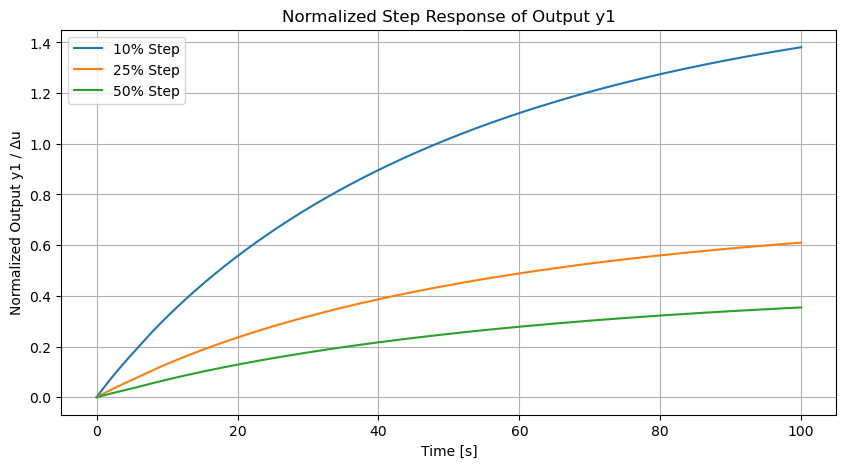

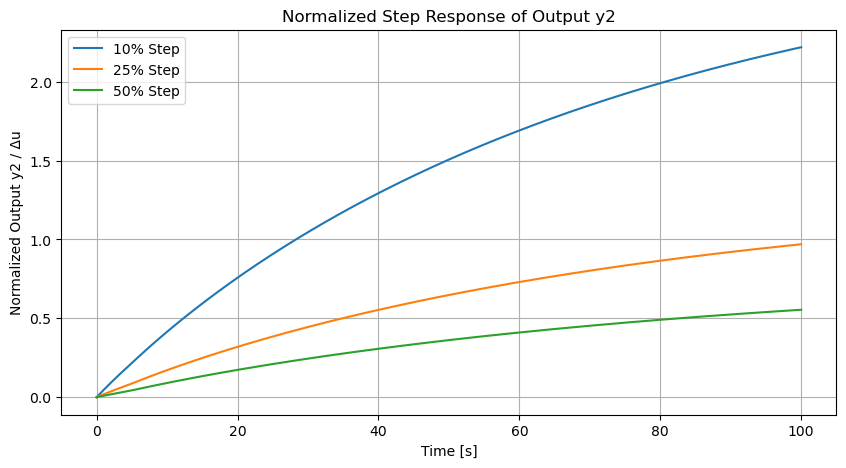

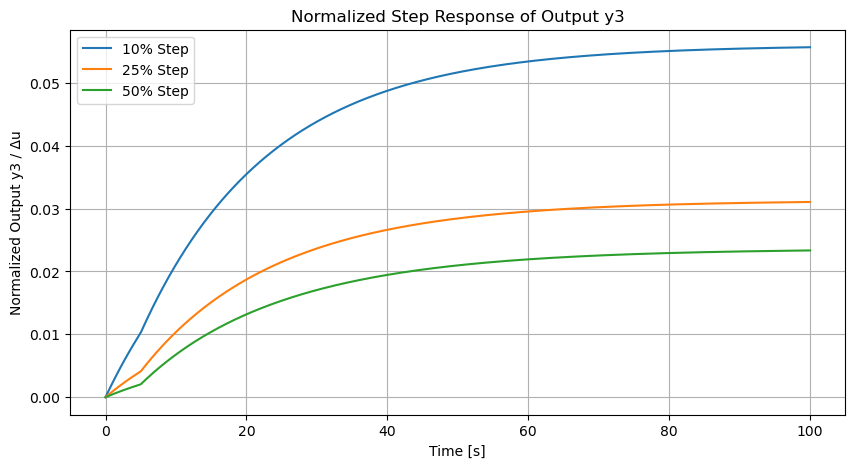

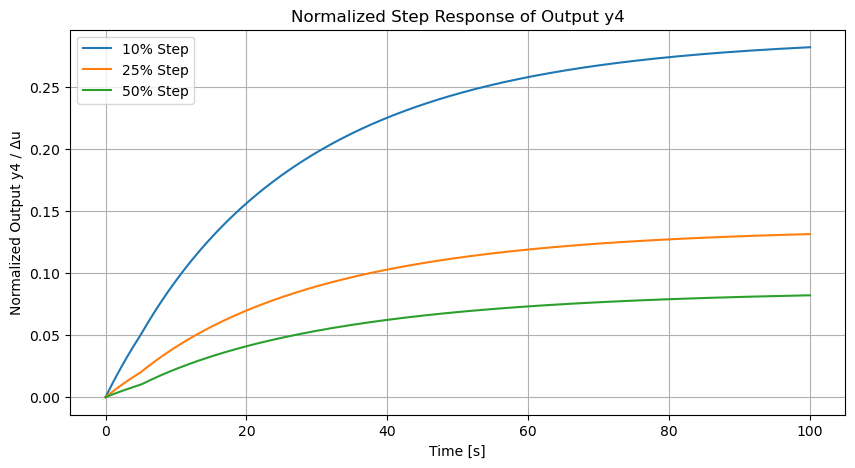

Simulating: 100%|██████████| 10000/10000 [00:01<00:00, 5062.85time step/s]


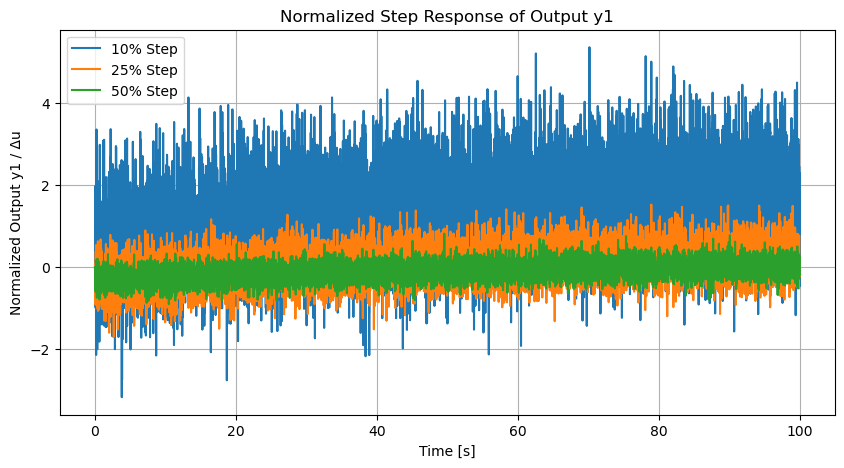

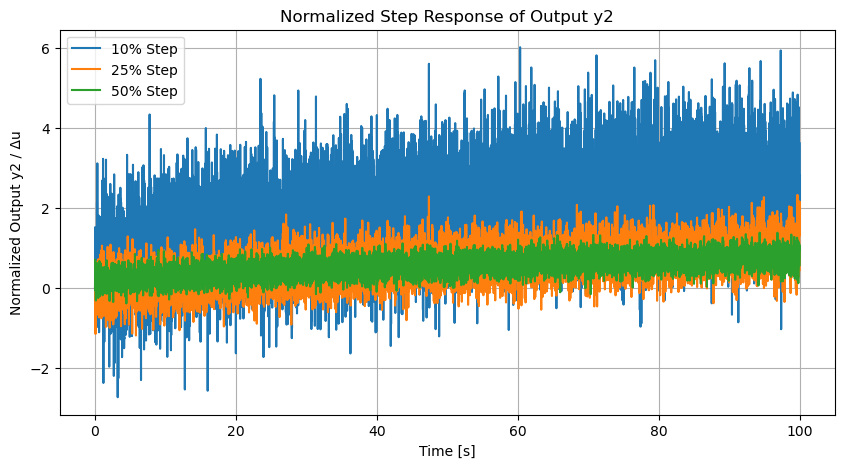

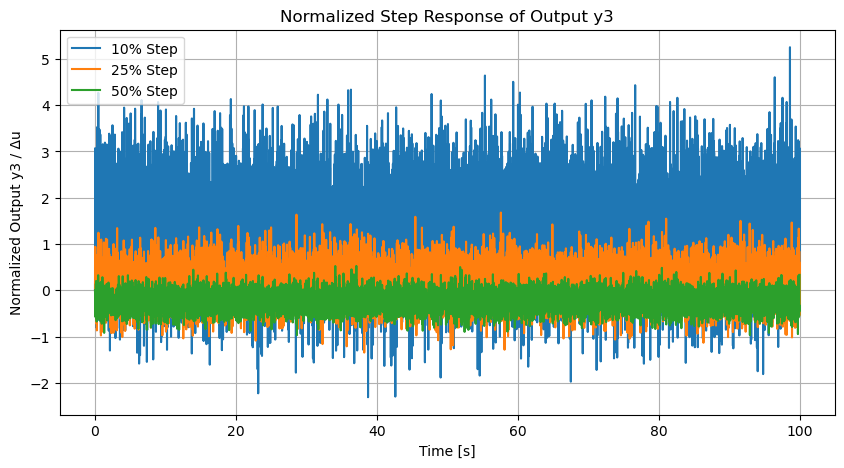

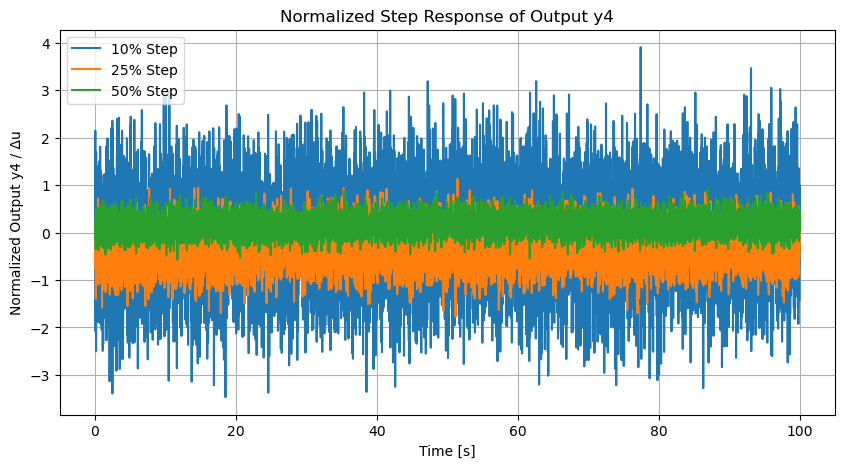

Simulating: 100%|██████████| 10000/10000 [00:01<00:00, 5130.33time step/s]


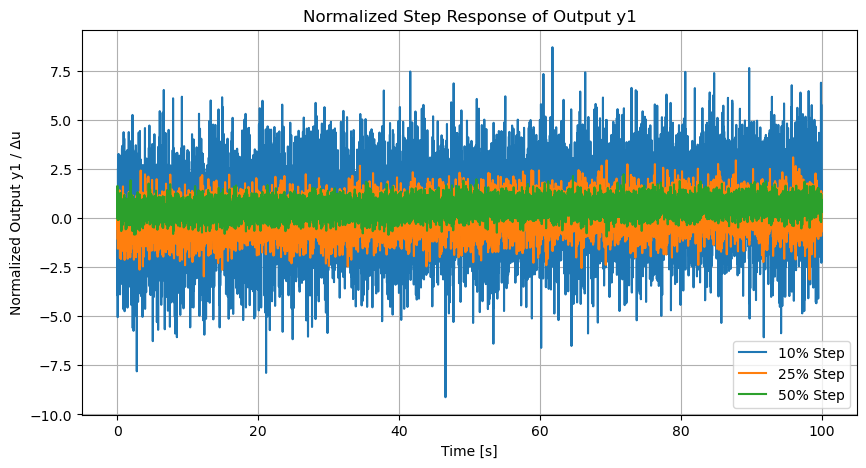

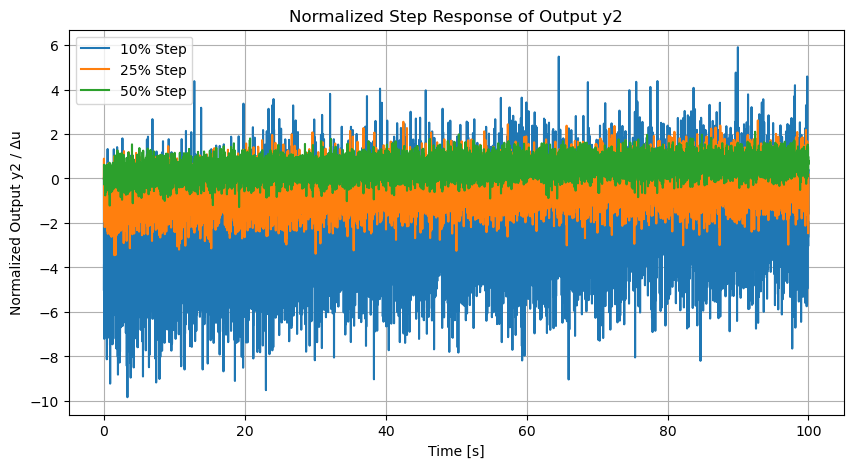

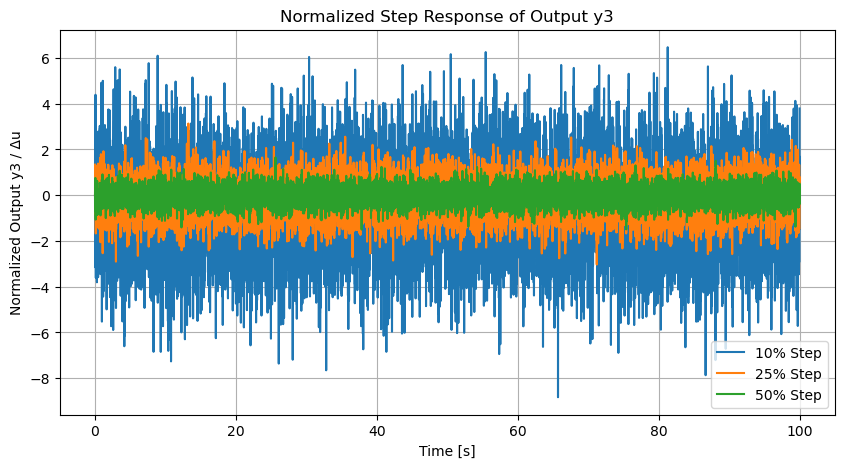

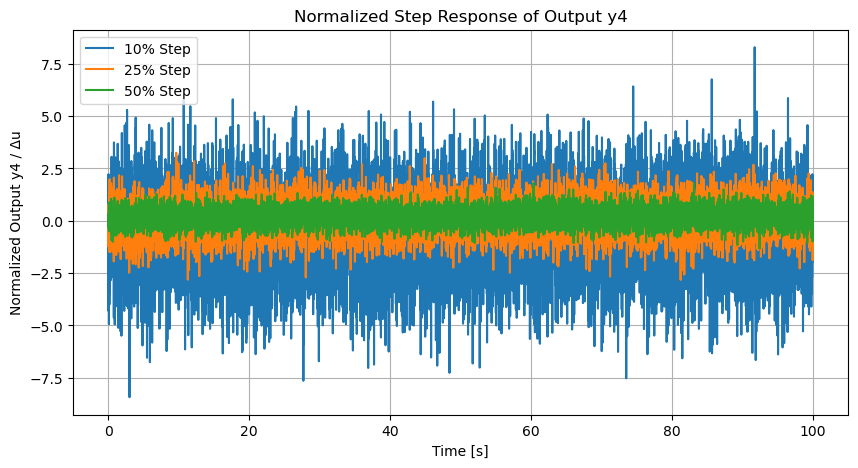

In [3]:
# Plot normalized step responses for stochastic model (all noise levels together)
from utils.plot import plot_normalized_steps
#===============================
# COLLECT RESULTS FOR NORMALIZED PLOT - STOCHASTIC
#===============================

percentages = [10, 25, 50]
u_nominal = 250
u_step_ref = 100

# Noise levels: low, medium, high
noise_levels = [
    {'measurement': 0, 'process': 0.0, 'label': 'Low Noise'},
    {'measurement': 10, 'process': 5.0, 'label': 'Medium Noise'},
    {'measurement': 20, 'process': 10.0, 'label': 'High Noise'}
]

params = np.array([
    # Pipe cross-sectional areas a [cm^2]
    1.2, 1.2, 1.2, 1.2,
    # Tank cross-sectional areas A [cm^2]
    380, 380, 380, 380,
    # Flow distribution ratios gamma [-]
    0.58, 0.72,
    # Gravity g [cm/s^2]
    981.0,
    # Density rho [g/cm^3]
    1.0
])

T = 100  # total simulation time [s]
dt = 0.01  # time step [s]
time = np.arange(0, T, dt)
x0 = np.array([500, 500, 500, 500])
d_seq = piecewise_constant([[0, 0], [0, 0]], total_time=T, dt=dt)

# For each noise level, plot normalized responses
for noise in noise_levels:
    results_list = []
    step_magnitudes_list = []
    
    model = FourTankSDE(
        params=params, 
        x0=x0, 
        measurement_noise_std=noise['measurement'],
        disturbance_noise_std=noise['process'],
        correlation_time=1.0
    )
    
    for p in percentages:
        u_step = u_step_ref * (p / 100)
        u = [[u_nominal + u_step]*20, [u_nominal + u_step]*20]
        u[0][0] = u_nominal
        u[1][0] = u_nominal
        u_seq = piecewise_constant(u, total_time=T, dt=dt)
        
        # Use simulate_sde for SDE model
        results = simulate_sde(time, u_seq, d_seq, model, dt)
        results_list.append(results)
        
        # Step magnitude for normalization (for each input)
        step_magnitudes_list.append(np.array([u_step, u_step]))
    
    # Plot normalized step responses for this noise level
    plot_normalized_steps(results_list, step_magnitudes_list, 
                         labels=['10% Step', '25% Step', '50% Step'], title=f'Normalized Step Responses - {noise["label"]}')

[[250, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]]


Simulating: 100%|██████████| 5000/5000 [00:01<00:00, 3709.15time step/s]


(<Figure size 1200x800 with 4 Axes>,
 array([[<Axes: title={'center': 'State Evolution'}, xlabel='Time [s]', ylabel='Mass [g]'>,
         <Axes: title={'center': 'Action Evolution'}, xlabel='Time [s]', ylabel='Flow Rate [cm�/s]'>],
        [<Axes: title={'center': 'Measurement Evolution'}, xlabel='Time [s]', ylabel='Height [cm]'>,
         <Axes: title={'center': 'Disturbance Evolution'}, xlabel='Time [s]', ylabel='Flow Rate [cm�/s]'>]],
       dtype=object))

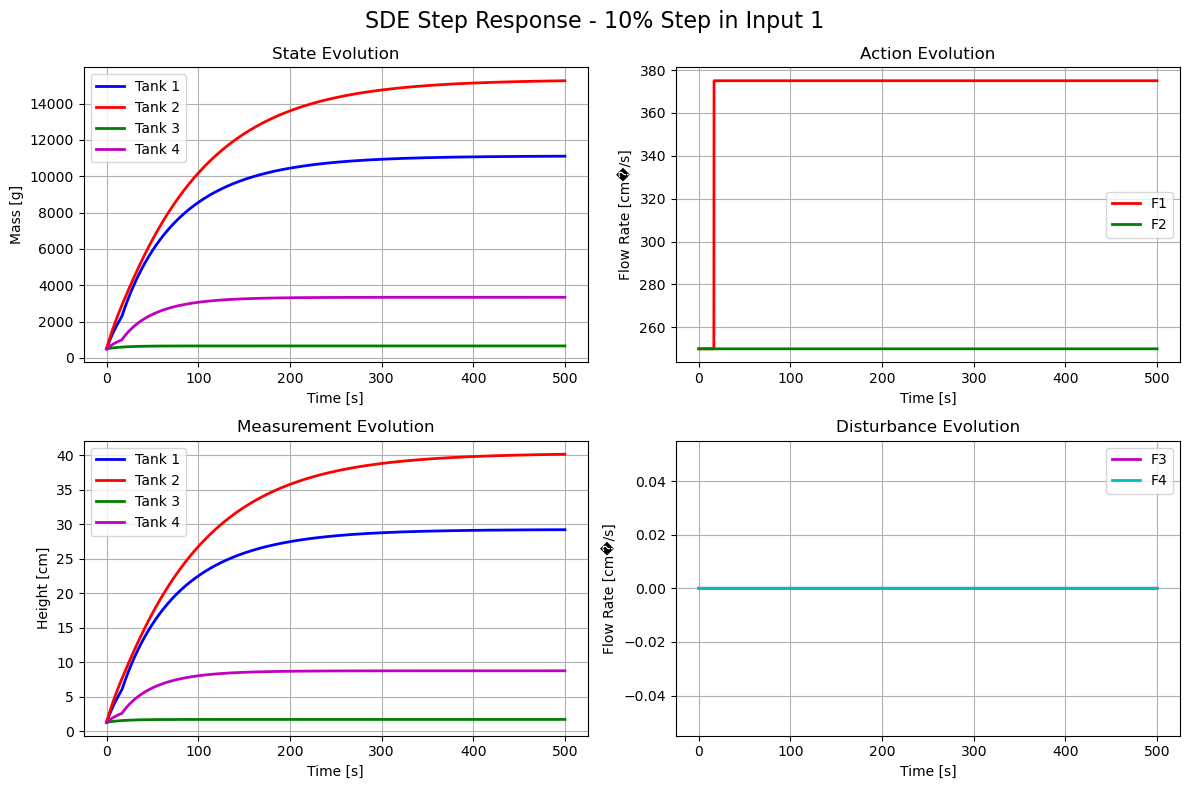

In [7]:
# Simple plot of a figure
percentage_step = 10
u_nominal = 250
step_ratio = 30 # ratio between step duration and nominal value
i = 0 # input u index (0 or 1)

measurement_noise_std = 0.0
process_noise_std = 0.0

T = 500  # total simulation time [s]
dt = 0.1  # time step [s]
time = np.arange(0, T, dt)

x0 = np.array([500, 500, 500, 500])  # initial mass in tanks [g]
d_seq = piecewise_constant([[0, 0], [0, 0]], total_time=T, dt=dt)

params = np.array([
    # Pipe cross-sectional areas a [cm^2]
    1.2, 1.2, 1.2, 1.2,
    # Tank cross-sectional areas A [cm^2]
    380, 380, 380, 380,
    # Flow distribution ratios gamma [-]
    0.58, 0.72,
    # Gravity g [cm/s^2]
    981.0,
    # Density rho [g/cm^3]
    1.0
])

model = FourTankSDE(
    params=params, 
    dt=dt,
    measurement_noise_std=measurement_noise_std,
    disturbance_noise_std=process_noise_std,
    correlation_time=1.0
)

u_step = u_nominal * (1 + (p / 100))
u = np.full((step_ratio, 2), u_nominal)
# Step only the i-th input (column), keep first step at nominal
u[1:, i] = u_step
# Convert numpy array to list of lists for piecewise_constant
u_list = [u[:, 0].tolist(), u[:, 1].tolist()]
print(u_list)
u_seq = piecewise_constant(u_list, total_time=T, dt=dt)

# Pass x0 to simulate_sde
results = simulate_sde(time, x0, u_seq, d_seq, model, dt)

plot_nonlinear_results(results, title=f'SDE Step Response - {percentage_step}% Step in Input {i+1}')



[[250, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 3908.43time step/s]


[[250, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 3867.22time step/s]


[[250, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4342.14time step/s]


[[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250], [250, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4594.24time step/s]


[[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250], [250, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4341.00time step/s]


[[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250], [250, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4585.82time step/s]


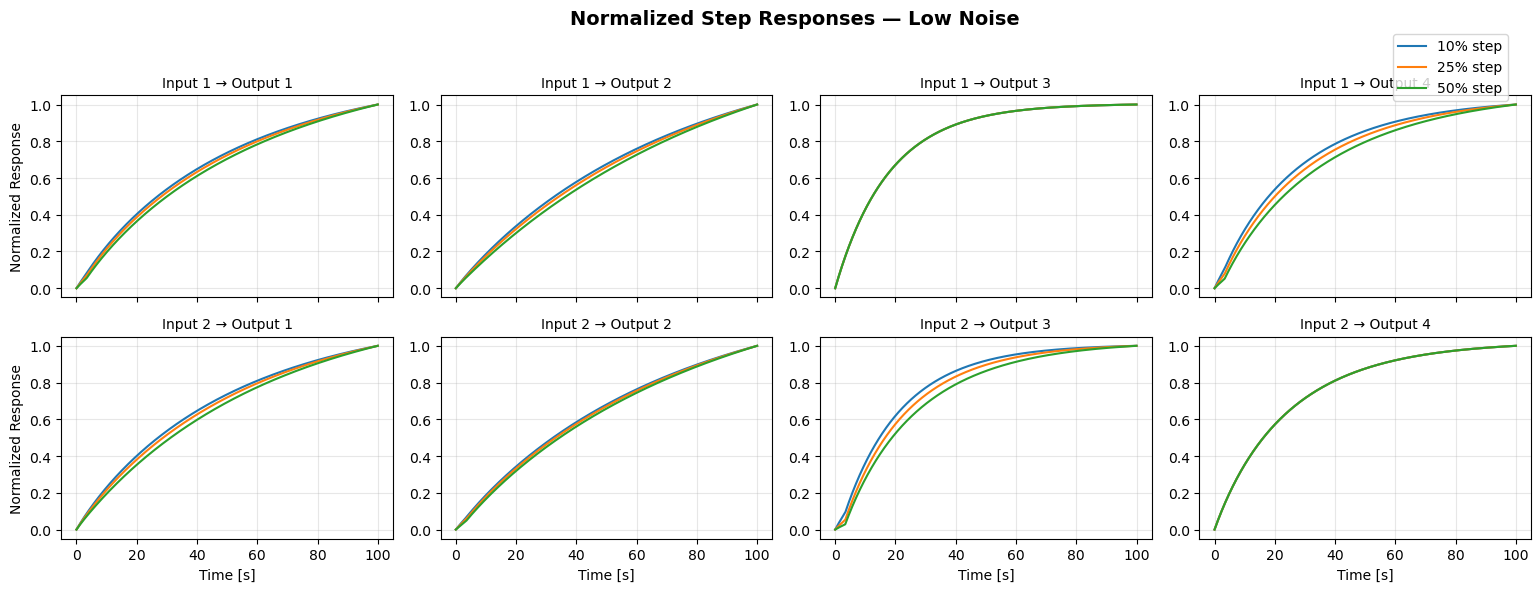

[[250, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 3892.96time step/s]


[[250, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4507.96time step/s]


[[250, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4615.13time step/s]


[[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250], [250, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4652.16time step/s]


[[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250], [250, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4563.00time step/s]


[[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250], [250, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4362.25time step/s]


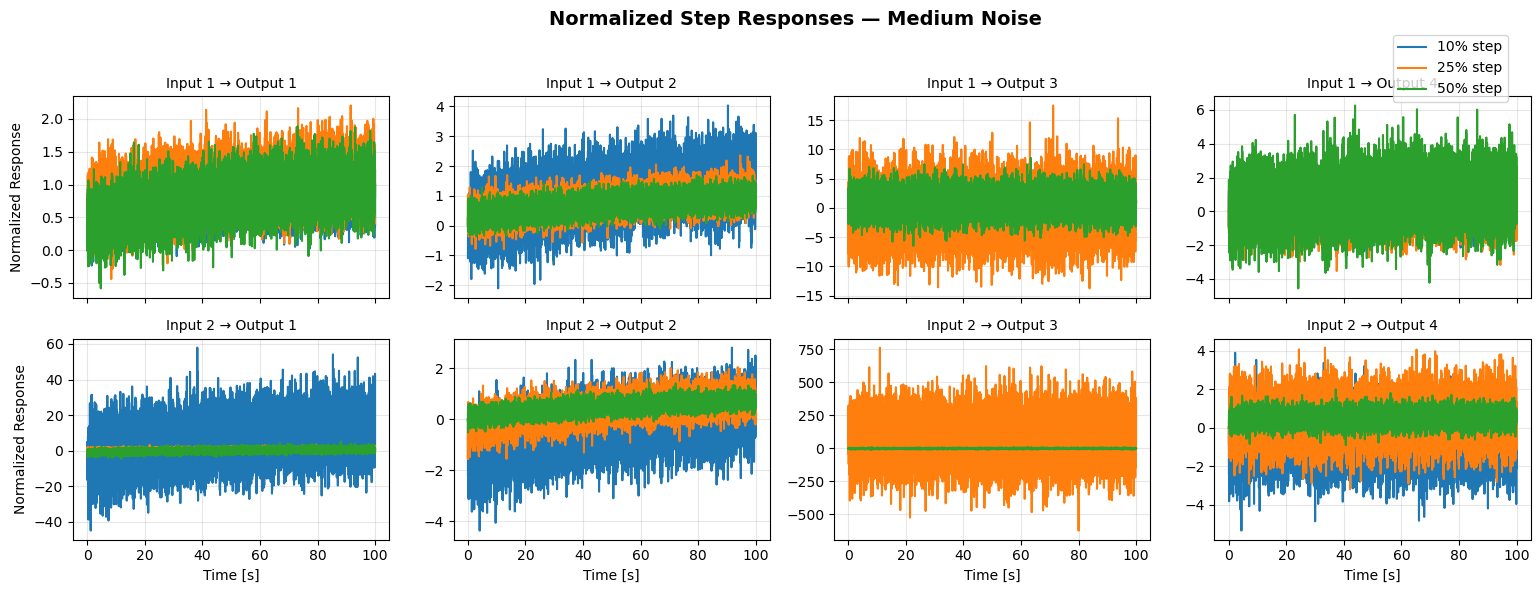

[[250, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4275.30time step/s]


[[250, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4264.42time step/s]


[[250, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375], [250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 3652.76time step/s]


[[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250], [250, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 3832.01time step/s]


[[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250], [250, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312, 312]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4341.00time step/s]


[[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250], [250, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375, 375]]


Simulating: 100%|██████████| 10000/10000 [00:02<00:00, 4013.35time step/s]


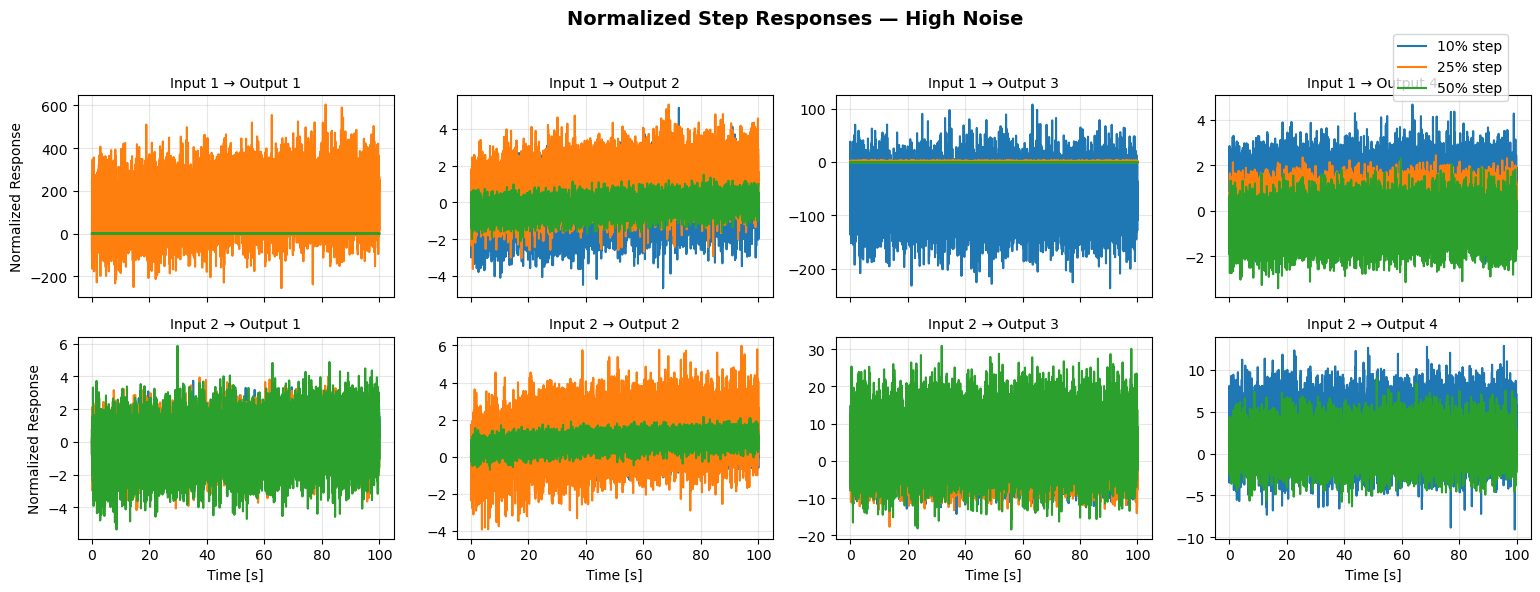

In [3]:
# Given a nominal u0, and a set of step of 10%, 25% and 50% increases w.r.t to u0. For each input output pair, produce one plot per noice level (low, medium, high); each with num_inputs(2) x num_outputs(4); each with one curve per step magnitude (3).as_integer_ratio

from models.sde_model import FourTankSDE
from utils.plot import plot_normalized_steps
#===============================
# COLLECT RESULTS FOR NORMALIZED PLOT - STOCHASTIC
#===============================

percentage_steps = [10, 25, 50]
u_nominal = 250
step_ratio = 30 # ratio between step duration and nominal value

# Noise levels: low, medium, high
noise_levels = [
    {'measurement': 0, 'process': 0.0, 'label': 'Low Noise'},
    {'measurement': 10, 'process': 5.0, 'label': 'Medium Noise'},
    {'measurement': 20, 'process': 10.0, 'label': 'High Noise'}
]

params = np.array([
    # Pipe cross-sectional areas a [cm^2]
    1.2, 1.2, 1.2, 1.2,
    # Tank cross-sectional areas A [cm^2]
    380, 380, 380, 380,
    # Flow distribution ratios gamma [-]
    0.58, 0.72,
    # Gravity g [cm/s^2]
    981.0,
    # Density rho [g/cm^3]
    1.0
])

T = 100  # total simulation time [s]
dt = 0.01  # time step [s]
time = np.arange(0, T, dt)
x0 = np.array([500, 500, 500, 500])
d_seq = piecewise_constant([[0, 0], [0, 0]], total_time=T, dt=dt)

# For each noise level, plot normalized responses
for noise in noise_levels:
    results_list = []
    
    model = FourTankSDE(
        params=params, 
        dt=dt,
        measurement_noise_std=noise['measurement'],
        disturbance_noise_std=noise['process'],
        correlation_time=1.0
    )
    # Organize results as [u1_10%, u1_25%, u1_50%, u2_10%, u2_25%, u2_50%]
    for i in [0, 1]:  # Input index
        for p in percentage_steps:  # Percentage step
            u_step = u_nominal * (1 + (p / 100))
            u = np.full((step_ratio, 2), u_nominal)
            # Step only the i-th input (column), keep first step at nominal
            u[1:, i] = u_step
            # Convert numpy array to list of lists for piecewise_constant
            u_list = [u[:, 0].tolist(), u[:, 1].tolist()]
            print(u_list)
            u_seq = piecewise_constant(u_list, total_time=T, dt=dt)
            
            # Pass x0 to simulate_sde
            results = simulate_sde(time, x0, u_seq, d_seq, model, dt)
            results_list.append(results)
    
    # Plot normalized step responses for this noise level
    plot_normalized_steps(results_list, percentage_steps, noise_label=noise["label"])